### Importación de datos


In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 0. Exploración Inicial


In [54]:
tienda.shape

(2359, 12)

In [55]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [56]:
tienda.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,2.359000e+03,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,4.878679e+05,26018.609580,3.976685,2.943196,5.365283,-74.789417
std,6.146868e+05,32860.001783,1.415370,2.819897,2.287445,1.217827
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.575000e+04,3100.000000,3.000000,1.000000,4.609710,-75.563590
50%,2.353000e+05,12400.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.781000e+05,36000.000000,5.000000,4.000000,6.251840,-74.081750
max,2.977000e+06,160800.000000,5.000000,24.000000,11.544440,-67.923900


In [57]:
tienda4.isnull().sum()

,0
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


# 1. Análisis de facturación


## Ingreso total por cada tienda

### Sumando los valores de la columna Precio de cada conjunto de datos de la tienda.


In [58]:
ingresoTotal1 = tienda['Precio'].sum()
ingresoTotal2 = tienda2['Precio'].sum()
ingresoTotal3 = tienda3['Precio'].sum()
ingresoTotal4 = tienda4['Precio'].sum()

In [59]:
print(f"Ingreso Total Tienda 1: {ingresoTotal1:.2f} \
    \nIngreso Total Tienda 2: {ingresoTotal2:.2f} \
     \nIngreso Total Tienda 3: {ingresoTotal3:.2f}  \
     \nIngreso Total Tienda 4: {ingresoTotal4:.2f}" )


Ingreso Total Tienda 1: 1150880400.00     
Ingreso Total Tienda 2: 1116343500.00      
Ingreso Total Tienda 3: 1098019600.00       
Ingreso Total Tienda 4: 1038375700.00


# 2. Ventas por categoría


## Calcular la cantidad de productos vendidos por categoría en cada tienda.


In [60]:
# Se muestra las categorías de productos en la tienda
tienda['Categoría del Producto']

,Categoría del Producto
0,Electrónicos
1,Muebles
2,Juguetes
3,Electrodomésticos
4,Muebles
...,...
2354,Electrónicos
2355,Electrónicos
2356,Juguetes
2357,Muebles


In [61]:
# Categorias de los dataset
tienda4['Categoría del Producto'].unique()


array(['Electrodomésticos', 'Muebles', 'Deportes y diversión', 'Libros',
       'Electrónicos', 'Instrumentos musicales', 'Juguetes',
       'Artículos para el hogar'], dtype=object)

In [62]:
# Cantidad de categorías de productos en la tienda
print(len(tienda4['Categoría del Producto'].unique()))

8


### Cantidad de productos vendidos por categoria en Tienda


In [63]:
ventasXcategoriaTienda = tienda['Categoría del Producto'].value_counts()
print(ventasXcategoriaTienda)

Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64


### Cantidad de productos vendidos por categoria en Tienda2


In [64]:
ventasXcategoriaTienda2 = tienda2['Categoría del Producto'].value_counts()
print(ventasXcategoriaTienda2)

Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64


### Cantidad de productos vendidos por categoria en Tienda3


In [65]:
ventasXcategoriaTienda3 = tienda3['Categoría del Producto'].value_counts()
print(ventasXcategoriaTienda3)

Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64


### Cantidad de productos vendidos por categoria en Tienda4


In [66]:
ventasXcategoriaTienda4 = tienda4['Categoría del Producto'].value_counts()
print(ventasXcategoriaTienda4)

Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes                   338
Deportes y diversión       277
Electrodomésticos          254
Artículos para el hogar    201
Libros                     187
Instrumentos musicales     170
Name: count, dtype: int64


# 3. Calificación promedio de la tienda


## Calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.


In [67]:
# Consultar las columnas del DataFrame
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

### Satisfacción promedio del cliente en Tienda


In [68]:
promedioTienda = tienda['Calificación'].mean()
print(f"El promedio de calificación de la tienda 1 es: {promedioTienda:.2f}")

El promedio de calificación de la tienda 1 es: 3.98


### Satisfacción promedio del cliente en Tienda2


In [69]:
promedioTienda2 = tienda2['Calificación'].mean()
print(f"El promedio de calificación de la tienda 2 es: {promedioTienda2:.2f}")

El promedio de calificación de la tienda 2 es: 4.04


### Satisfacción promedio del cliente en Tienda3


In [70]:
promedioTienda3 = tienda3['Calificación'].mean()
print(f"El promedio de calificación de la tienda 3 es: {promedioTienda3:.2f}")

El promedio de calificación de la tienda 3 es: 4.05


### Satisfacción promedio del cliente en Tienda4


In [71]:
promedioTienda4 = tienda4['Calificación'].mean()
print(f"El promedio de calificación de la tienda 4 es: {promedioTienda4:.2f}")

El promedio de calificación de la tienda 4 es: 4.00


# 4. Productos más y menos vendidos


## Identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.


In [72]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [73]:
def productosMasYMenosVendidos(df, nombreTienda, n=3):
    productos_vendidos = df['Producto'].value_counts()

    # Se hace uso de .head() para obtener los n productos más vendidos 
    productos_mas_vendidos = productos_vendidos.head(n)
    # Se hace uso de .tail() para obtener los n productos menos vendidos
    productos_menos_vendidos = productos_vendidos.tail(n)

    print(f"---------- {nombreTienda} ----------")
    print(f"\nProductos más vendidos en {nombreTienda}:\n{productos_mas_vendidos}")
    print(f"\nProductos menos vendidos en {nombreTienda}:\n{productos_menos_vendidos}")
    print("\n------------------------------\n")
    

In [74]:
# Contar la cantidad de veces que se vende cada producto en la tiendaN
productosMasYMenosVendidos(tienda, "Tienda 1", 5)
productosMasYMenosVendidos(tienda2, "Tienda 2")
productosMasYMenosVendidos(tienda3, "Tienda 3", 4) 
productosMasYMenosVendidos(tienda4, "Tienda 4")

---------- Tienda 1 ----------

Productos más vendidos en Tienda 1:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Productos menos vendidos en Tienda 1:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

------------------------------

---------- Tienda 2 ----------

Productos más vendidos en Tienda 2:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Name: count, dtype: int64

Productos menos vendidos en Tienda 2:
Producto
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

------------------------------

---------- Tienda 3 ----------

Productos más vendidos en Tienda 3:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king   

# 5. Envío promedio por tienda


### Calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [75]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


### Promedio de Costo de Envió en Tienda 1

In [76]:
promedioTiendaCosto = tienda['Costo de envío'].mean()
print(f"El promedio del costo de envío de la tienda 1 es: ${promedioTiendaCosto:.2f}")

El promedio del costo de envío de la tienda 1 es: $26018.61


### Promedio de Costo de Envió en Tienda 2

In [77]:
promedioTienda2Costo = tienda2['Costo de envío'].mean()
print(f"El promedio del costo de envío de la tienda 2 es: ${promedioTienda2Costo:.2f}")

El promedio del costo de envío de la tienda 2 es: $25216.24


### Promedio de Costo de Envió en Tienda 3

In [78]:
promedioTienda3Costo = tienda3['Costo de envío'].mean()
print(f"El promedio del costo de envío de la tienda 3 es: ${promedioTienda3Costo:.2f}")

El promedio del costo de envío de la tienda 3 es: $24805.68


### Promedio de Costo de Envió en Tienda 4

In [79]:
promedioTienda4Costo = tienda4['Costo de envío'].mean()
print(f"El promedio del costo de envío de la tienda 4 es: ${promedioTienda4Costo:.2f}")

El promedio del costo de envío de la tienda 4 es: $23459.46


# Visualización de los datos

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker 
import numpy as np
import os

In [3]:
lista_tiendas = [(tienda, "Tienda 1"),
                 (tienda2, "Tienda 2"),
                 (tienda3, "Tienda 3"),
                 (tienda4, "Tienda 4")] 

## Análisis de Productos Más Vendidos por Tienda

La función `analizar_mas_menos_vendidos(lista_tupla)` genera un conjunto de gráficos que permiten visualizar cuáles son los productos más vendidos en cada una de las tiendas incluidas en la lista `lista_tupla`.

### ¿Qué recibe la función?

La función espera una lista donde cada elemento es una tupla con esta forma:

```python
(df_tienda, "Nombre de la tienda")


In [4]:
def analizar_vendidos_vertical(lista_tuplas):
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12)) 
    axes = axes.flatten()

    for i, (df, nombre) in enumerate(lista_tuplas): 
        ax = axes[i]
    
        df_vendidos = df['Producto'].value_counts().head(5)
        
        # Recortamos nombres a 20 caracteres para que no sean eternos
        nombres_cortos = [n[:20] + '...' if len(n) > 20 else n for n in df_vendidos.index]
        cantidades = df_vendidos.values
        
        ax.bar(nombres_cortos, cantidades, color='#FFB6C1')
        
        ax.set_title(f'Top 5 Más Vendidos - {nombre}', fontweight='bold')
        ax.set_ylabel('Cantidad') 
        
        ax.set_xticks(range(len(nombres_cortos))) 
        ax.set_xticklabels(nombres_cortos, rotation=45, ha='right')

    plt.subplots_adjust(wspace=0.3, hspace=0.6, bottom=0.15)
    
    plt.show()




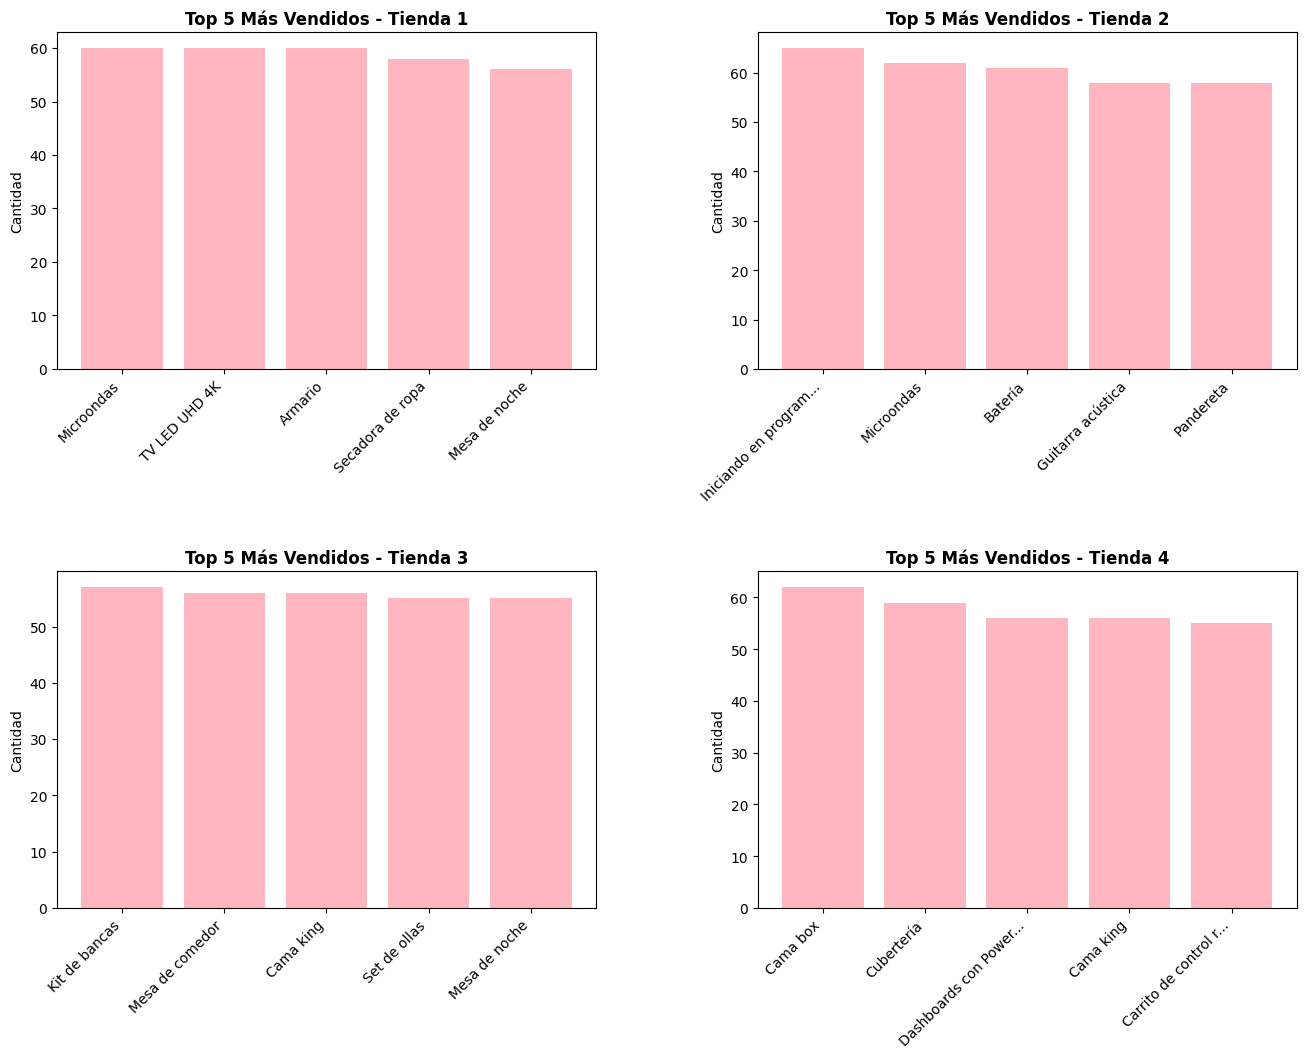

In [5]:
analizar_vendidos_vertical(lista_tiendas)

## Preparación de los datos

In [3]:
# Recomendada para trabajar mejor, se agrega una columna que identifique la tienda en cada DataFrame antes de concatenarlos.
tienda['Tienda_ID'] = 'Tienda 1'
tienda2['Tienda_ID'] = 'Tienda 2'
tienda3['Tienda_ID'] = 'Tienda 3'
tienda4['Tienda_ID'] = 'Tienda 4'
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [7]:
df_total.shape

(9435, 13)

In [8]:
type(df_total   )

pandas.core.frame.DataFrame

In [4]:
df_total.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,9.435000e+03,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,4.667323e+05,24875.145734,4.014520,2.927398,5.428909,-74.760108
std,5.903207e+05,31480.036346,1.390518,2.802776,2.355663,1.207155
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.520000e+04,3000.000000,3.000000,1.000000,4.609710,-75.563590
50%,2.215000e+05,11700.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.633000e+05,34900.000000,5.000000,4.000000,6.251840,-74.081750
max,2.977000e+06,162500.000000,5.000000,24.000000,11.544440,-67.923900


## Modificación del campo "Fecha de Compra" más adelante vamos a hacer uso.

In [3]:
print(df_total['Fecha de Compra'].dtype)

object


In [22]:
df_total['Fecha de Compra']

,Fecha de Compra
0,16/01/2021
1,18/05/2022
2,15/03/2021
3,03/05/2022
4,07/11/2020
...,...
9430,12/02/2020
9431,17/05/2022
9432,03/05/2022
9433,15/06/2020


In [4]:
df_total['Fecha de Compra'] = pd.to_datetime(
    df_total['Fecha de Compra'], 
    format='%d/%m/%Y'  # ← %d (Día), / (Barra), %m (Mes), / (Barra), %Y (Año)
)

In [5]:
df_total['Fecha de Compra']

,Fecha de Compra
0,2021-01-16
1,2022-05-18
2,2021-03-15
3,2022-05-03
4,2020-11-07
...,...
9430,2020-02-12
9431,2022-05-17
9432,2022-05-03
9433,2020-06-15


## Visualización de los Ingresos Totales de las Tiendas

### Objetivo
La función `graficarIngresosTotales(df_total)` calcula y visualiza los ingresos totales por tienda a partir de un DataFrame que contiene ventas. Genera un gráfico de barras donde cada barra representa la suma de la columna `Precio` para una tienda identificada por `Tienda_ID`, y coloca el valor monetario sobre cada barra.

### Entrada esperada
- `df_total`: DataFrame de pandas que debe contener, al menos, las columnas:
  - `Tienda_ID` — identificador de la tienda (puede ser int o string).
  - `Precio` — valor de venta por fila (float o int).

### Líneas de código relevante:

1. **Agrupar y sumar ingresos por tienda**
   ```python
   datos_agrupados = df_total.groupby('Tienda_ID')['Precio'].sum().sort_index()


In [22]:
def graficarIngresosTotales(df_total):
    
    datos_agrupados = df_total.groupby('Tienda_ID')['Precio'].sum().sort_index()

    nombres = datos_agrupados.index  
    ingresos = datos_agrupados.values 
    
    plt.figure(figsize=(10, 6))
    
    barras = plt.bar(nombres, ingresos, color=['#FFD1DC', '#77DD77', '#ADD8E6', '#B0BEC5'])
    
    plt.title('Ingresos Totales por Tienda', fontsize=16, fontweight='bold')
    plt.xlabel('Tiendas')
    plt.ylabel('Ingresos Totales ($)')
    plt.grid(axis='y', linestyle='--', alpha=0.7) 
    
    # Recorremos cada barra y le ponemos una etiqueta de texto
    for barra in barras:
        altura = barra.get_height()
        plt.text(x=barra.get_x() + barra.get_width()/2, y=altura, 
                 s=f'${altura:,.0f}', 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.show()

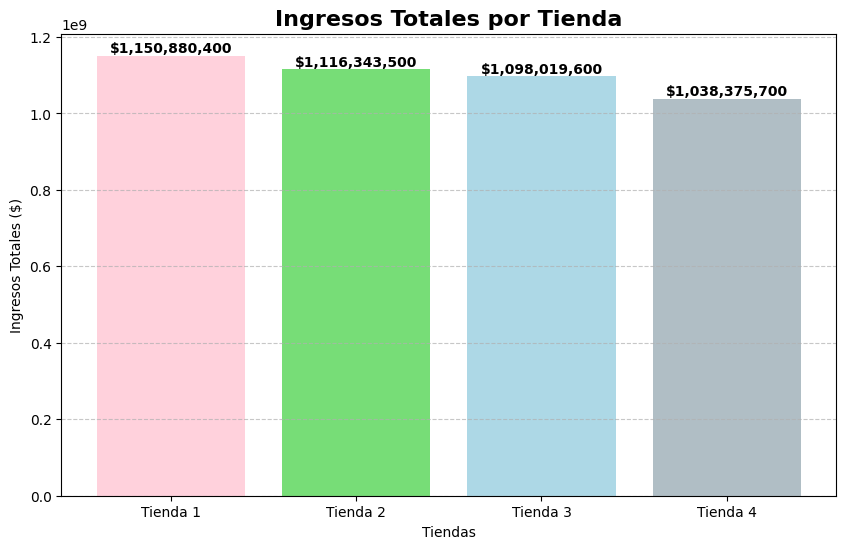

In [23]:
graficarIngresosTotales(df_total)

## Análisis de productos más costosos por Tienda

### Objetivo
La función `analizar_productos_top_precio_variados(df_tiendas)` identifica los 10 productos únicos más caros dentro de un DataFrame que contiene datos de tiendas y precios, y los visualiza en un gráfico de barras horizontal con color según la tienda (`Tienda_ID`) donde aparece ese producto.

### Entrada esperada
- `df_tiendas`: DataFrame de pandas que contiene, al menos, las columnas:
  - `Producto` — nombre del producto.
  - `Precio` — precio unitario (numérico).
  - `Tienda_ID` — identificador de la tienda / vendedor.

### Líneas de códigos relevantes:

1. **Ordena el DataFrame por la columna Precio de mayor a menor obteniendo como respuesta los productos más caros quedan primero.**
```python
df_ordenado = df_tiendas.sort_values(by='Precio', ascending=False)
```

2. **Eliminacion de filas repetidas, dejando la primera aparición de cada producto.**
```python
top_caros_unicos = df_ordenado.drop_duplicates(subset=['Producto'], keep='first').head(10)
```

In [12]:
def analizar_productos_top_precio_variados(df_tiendas):

    df_ordenado = df_tiendas.sort_values(by='Precio', ascending=False)
    
    top_caros_unicos = df_ordenado.drop_duplicates(subset=['Producto'], keep='first').head(10)
    
    plt.figure(figsize=(12, 8))
    
    sns.barplot(
        data=top_caros_unicos, 
        x='Precio', 
        y='Producto', 
        hue='Tienda_ID', 
        dodge=False, # Esto hace que las barras sean gruesas
        palette='viridis'
    )
    
    plt.title('Top 10 Productos Únicos Más Costosos', fontsize=16, fontweight='bold')
    plt.xlabel('Precio Unitario ($)')
    plt.ylabel('')
    plt.legend(title='Vendido en:', loc='lower right')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    

    ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
    
    plt.tight_layout()
    plt.show()



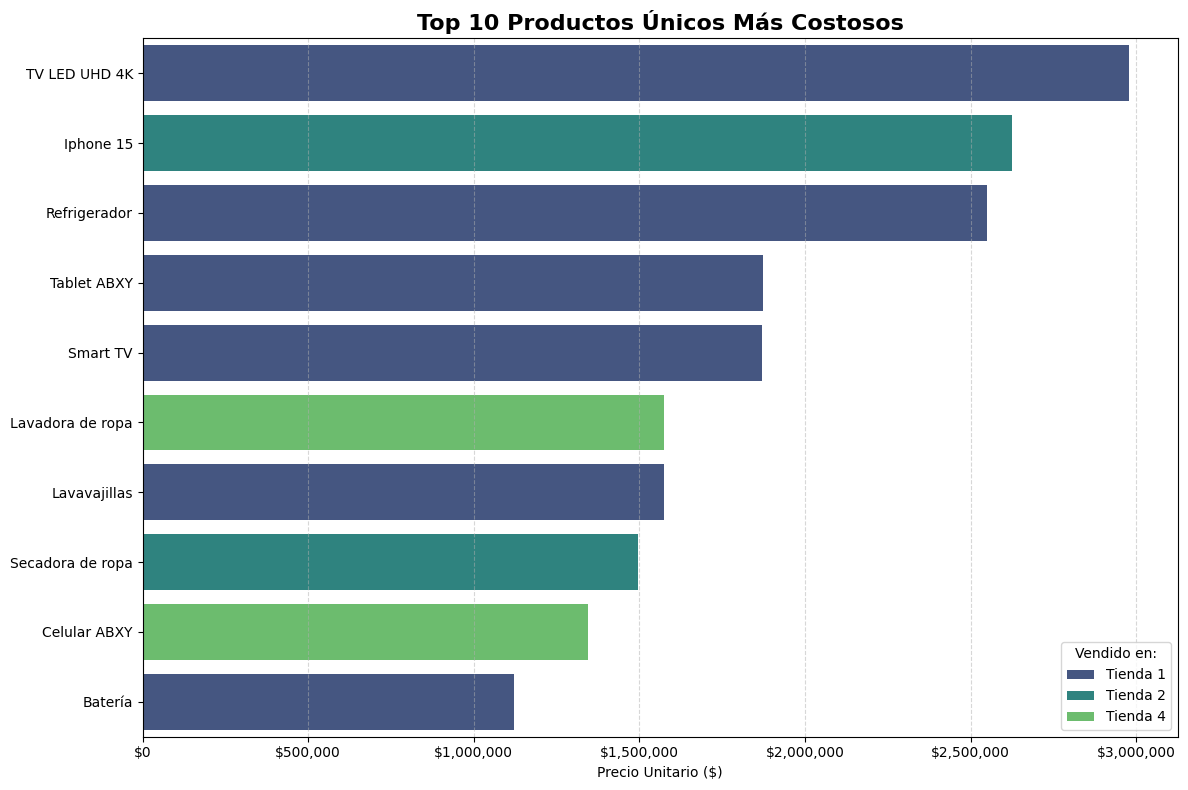

In [13]:
analizar_productos_top_precio_variados(df_total)

## Análisis de la cantidad de productos más costosos vendidos por Tienda

### Objetivo
La función `top_de_productos_por_tienda(df_tiendas, top_n=5)` identifica los 5 productos únicos más populares dentro de un DataFrame que contiene datos de tiendas y precios, y los visualiza en un gráfico de barras con color según la tienda (`Tienda_ID`) donde aparece ese producto.

### Entrada esperada
- `df_tiendas`: DataFrame de pandas que contiene, al menos, las columnas:
  - `Producto` — nombre del producto.
  - `Precio` — precio unitario (numérico).
  - `Tienda_ID` — identificador de la tienda / vendedor.
- `top_n=5`: valor que indica la cantidad de productos a mostrar, por defecto 5.

### Líneas de códigos relevantes:

1. **Lista con los nombres de los 5 productos más caros, ordena los productos del más caro al más barato, también elimina los duplicados de productos e indica los primeros 5 productos.**
```python
productos_top = (
        df.sort_values(by="Precio", ascending=False)
          .drop_duplicates(subset="Producto")
          .head(top_n)["Producto"]
          .tolist()
    )
```

2. **Filtra el DataFrame original para mantener solo las filas que corresponden a los productos más caros.**
```python
df_filtrado = df[df["Producto"].isin(productos_top)]
```

3. **Crea una tabla cruzada.**
```python
tabla = df_filtrado.pivot_table(
        index="Producto",
        columns="Tienda_ID",
        values="Precio",
        aggfunc="count",
        fill_value=0
    )
```

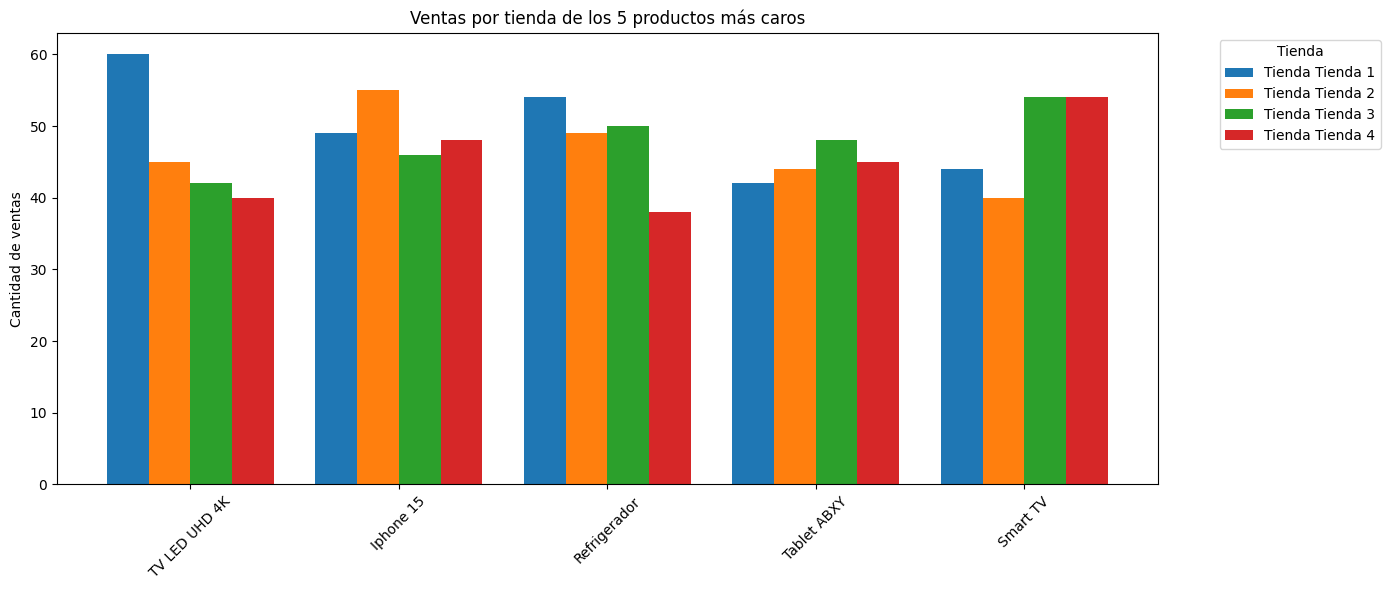

In [ ]:
def top_productos_por_tienda(df, top_n=5):
    productos_top = (
        df.sort_values(by="Precio", ascending=False)
          .drop_duplicates(subset="Producto")
          .head(top_n)["Producto"]
          .tolist()
    )

    df_filtrado = df[df["Producto"].isin(productos_top)]

   
    tabla = df_filtrado.pivot_table(
        index="Producto",
        columns="Tienda_ID",
        values="Precio",
        aggfunc="count",
        fill_value=0
    )

   
    tabla = tabla.loc[productos_top]


    tiendas = tabla.columns.tolist()
    x = np.arange(len(productos_top))
    ancho = 0.2 
    colores = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # colores fijos

    plt.figure(figsize=(14, 6))

    for i, tienda in enumerate(tiendas):
        plt.bar(
            x + i * ancho,
            tabla[tienda],
            width=ancho,
            label=f"Tienda {tienda}",
            color=colores[i % len(colores)]
        )

    plt.xticks(x + ancho * (len(tiendas)/2 - 0.5), productos_top, rotation=45)
    plt.ylabel("Cantidad de ventas")
    plt.title(f"Ventas por tienda de los {top_n} productos más caros")
    plt.legend(title="Tienda", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()


top_productos_por_tienda(df_total, top_n=5)


## Análisis con mapa de calor de productos más costosos vendidos por Tienda

### Objetivo
La función `comparar_ventas_productos_top(df_total)` analiza la distribución de ventas de los productos más costosos dentro de un DataFrame que contiene datos de tiendas y precios, los visualiza en un mapa de calor (Heatmap) donde indica cuántas unidades de esos productos ha vendido cada tienda.

### Entrada esperada
- `df_tiendas`: DataFrame de pandas que contiene, al menos, las columnas:
  - `Producto` — nombre del producto.
  - `Precio` — precio unitario (numérico).
  - `Tienda_ID` — identificador de la tienda / vendedor.

### Líneas de códigos relevantes:

1. **Identifición de Produtos Top se obtiene una lista de los nombres de los 10 productos más caros.**
```python
productos_top = (
        df.sort_values(by="Precio", ascending=False)
          .drop_duplicates(subset="Producto")
          .head(top_n)["Producto"]
          .tolist()
    )
```

2. **Filtra el DataFrame original para mantener solo las filas que corresponden a los productos más caros.**
```python
df_filtrado = df[df["Producto"].isin(productos_top)]
```

3. **Crea una tabla cruzada, se genera la matriz necesaria para el mapa de calor, contando cuántas veces aparece cada producto en cada tienda.**
```python
tabla = df_filtrado.pivot_table(
        index="Producto",
        columns="Tienda_ID",
        values="Precio",
        aggfunc="count",
        fill_value=0
    )
```

In [10]:
def comparar_ventas_productos_top(df_unificado):

    top_productos_names = df_unificado.sort_values(by='Precio', ascending=False)\
                                      .drop_duplicates(subset=['Producto'])\
                                      .head(10)['Producto'].tolist()
    
    
    df_filtrado = df_unificado[df_unificado['Producto'].isin(top_productos_names)]
    
    # CREAR TABLA CRUZADA
    tabla_comparativa = pd.crosstab(df_filtrado['Producto'], df_filtrado['Tienda_ID'])
    
    
    #print("Tabla de Cantidad de Ventas por Tienda (Productos Top):")
    #print(tabla_comparativa)
    #print("-" * 50)

    plt.figure(figsize=(12, 8))
    
    sns.heatmap(tabla_comparativa, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
    
    plt.title('¿Qué tienda vende los Productos Más Caros?', fontsize=16, fontweight='bold')
    plt.xlabel('Tienda')
    plt.ylabel('Producto Premium')
    plt.show()

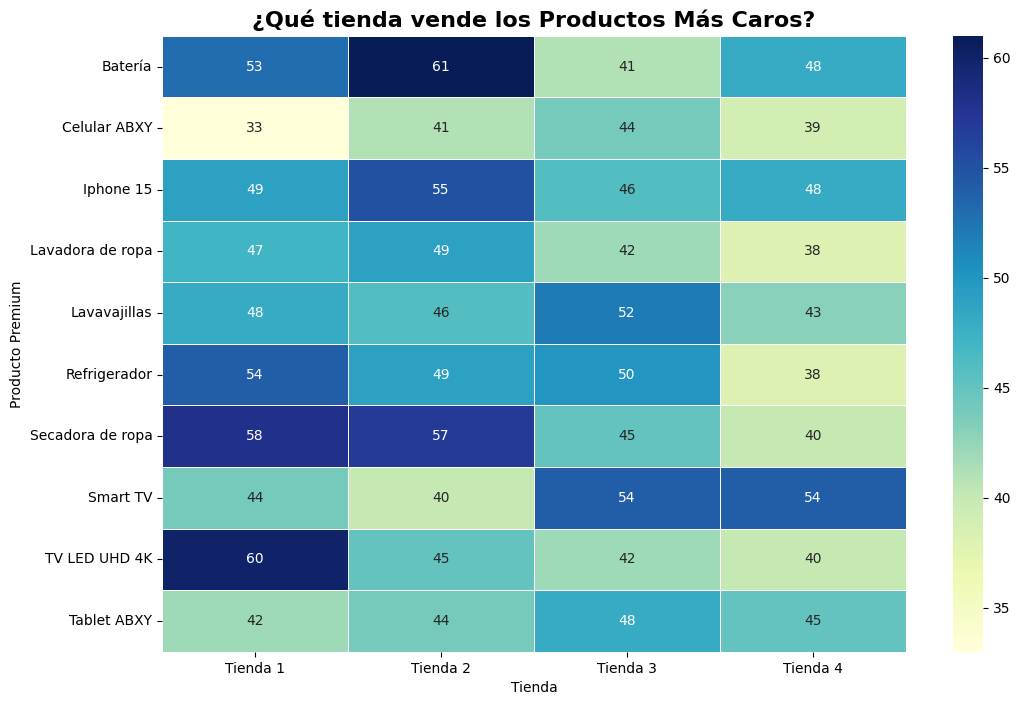

In [11]:
comparar_ventas_productos_top(df_total)

## Evolución Temporal


### Objetivo
La función `analizar_evolucion_temporal(df_total)` visualiza la tendencia histórica de los ingresos por cada tienda agrupados mensualmente. Su propósito principal es identificar patrones de estacionalidad, detectar si alguna tienda ha dejado de operar (muerte súbita) y comparar el rendimiento en picos de venta.

### Entrada esperada
- `df_tiendas`: DataFrame de pandas que contiene, al menos, las columnas:
  - `Fecha de Compra` — en formato datetime.
  - `Precio` — precio unitario (numérico).
  - `Tienda_ID` — identificador de la tienda / vendedor.

### Líneas de códigos relevantes:

1. **Agrupación Mensual, convierte  las fechas diarias en periódos mensuales, para simplificar el gráfico y sumar las ventas de todo el mes.**
```python
df.groupby([df['Fecha de Compra'].dt.to_period('M'), 'Tienda_ID'])['Precio'].sum()
```

2. **Conversión para graficar, se convierte de nuevo a marcas de tiempo (timestamp) para el eje X.**
```python
ventas_mensuales['Fecha de Compra'] = ventas_mensuales['Fecha de Compra'].dt.to_timestamp()
```

In [34]:
def analizar_evolucion_temporal(df):
    color = ["#FFD700", "#FFB6C1", "#20CF9A", '#B0BEC5'] 
    # Agrupar por Mes y por Tienda
    ventas_mensuales = df.groupby([df['Fecha de Compra'].dt.to_period('M'), 'Tienda_ID'])['Precio'].sum().reset_index()
    
    ventas_mensuales['Fecha de Compra'] = ventas_mensuales['Fecha de Compra'].dt.to_timestamp()

    plt.figure(figsize=(14, 6))
    
    sns.lineplot(
        data=ventas_mensuales, 
        x='Fecha de Compra', 
        y='Precio', 
        hue='Tienda_ID', 
        marker='o', 
        linewidth=2.5,
        palette=color
    )
    
    plt.title('Evolución de Ingresos Mensuales', fontsize=16)
    plt.ylabel('Ingresos ($)')
    plt.xlabel('Fechas')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


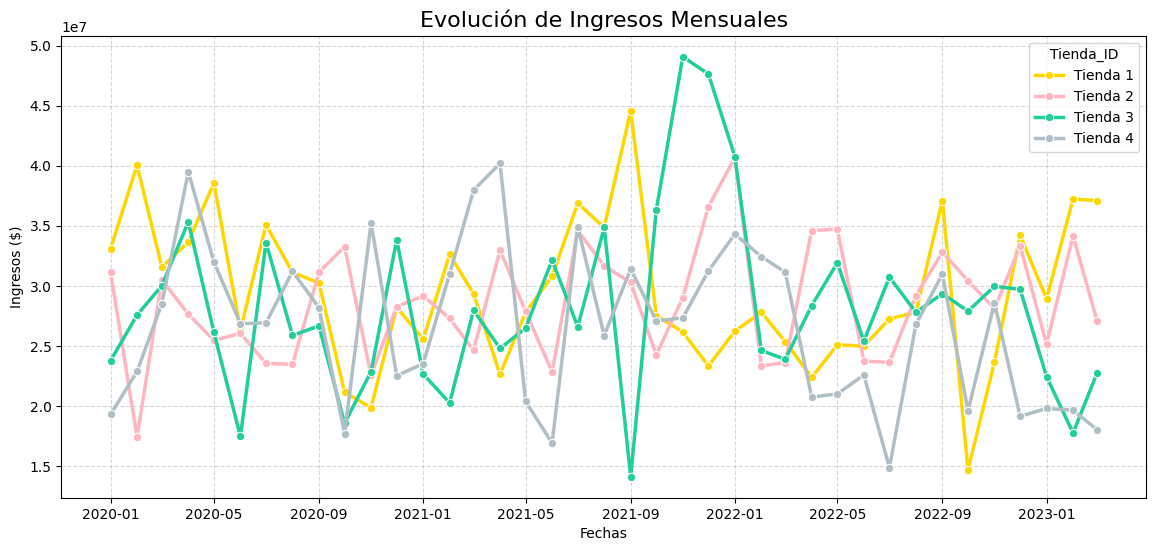

In [35]:
analizar_evolucion_temporal(df_total)

## Análisis Estacional


### Objetivo
Esta función `analizar_meses_demandados(df_total)` analiza la estacionalidad de las ventas, identificando qué meses del año son históricamente más fuertes o débiles para cada tienda.

### Entrada esperada
- `df_tiendas`: DataFrame de pandas que contiene, al menos, las columnas:
  - `Fecha de Compra` — en formato datetime.
  - `Precio` — precio unitario (numérico).
  - `Tienda_ID` — identificador de la tienda / vendedor.

### Líneas de códigos relevantes:

1. **Extracción de Atributos de Fecha se crean columnas auxiliares para separar el nombre del mes y el número del mes.**
```python
df['Mes'] = df['Fecha de Compra'].dt.month_name()
df['Mes_Num'] = df['Fecha de Compra'].dt.month
```

2. **Agrupación Estacional se suma los ingresos ignorando el año, agrupando solo por el número de mes y la tienda.**
```python
ventas_por_mes = df.groupby(['Mes_Num', 'Mes', 'Tienda_ID'])['Precio'].sum()
```

In [8]:
def analizar_meses_demandados(df):
    color = ["#FFD700", "#FFB6C1", "#20CF9A", '#B0BEC5'] 
    
    df['Mes'] = df['Fecha de Compra'].dt.month_name()
    df['Mes_Num'] = df['Fecha de Compra'].dt.month
    
    plt.figure(figsize=(12, 6))
    
    ventas_por_mes = df.groupby(['Mes_Num', 'Mes', 'Tienda_ID'])['Precio'].sum().reset_index()
    ventas_por_mes = ventas_por_mes.sort_values('Mes_Num')
    
    sns.barplot(
        data=ventas_por_mes, 
        x='Mes', 
        y='Precio', 
        hue='Tienda_ID', 
        palette=color
    )
    
    plt.title('Comparativa de Ventas por Mes (Estacionalidad)', fontsize=16)
    plt.xticks(rotation=45)
    plt.ylabel('Ingresos Totales ($)')
    plt.show()



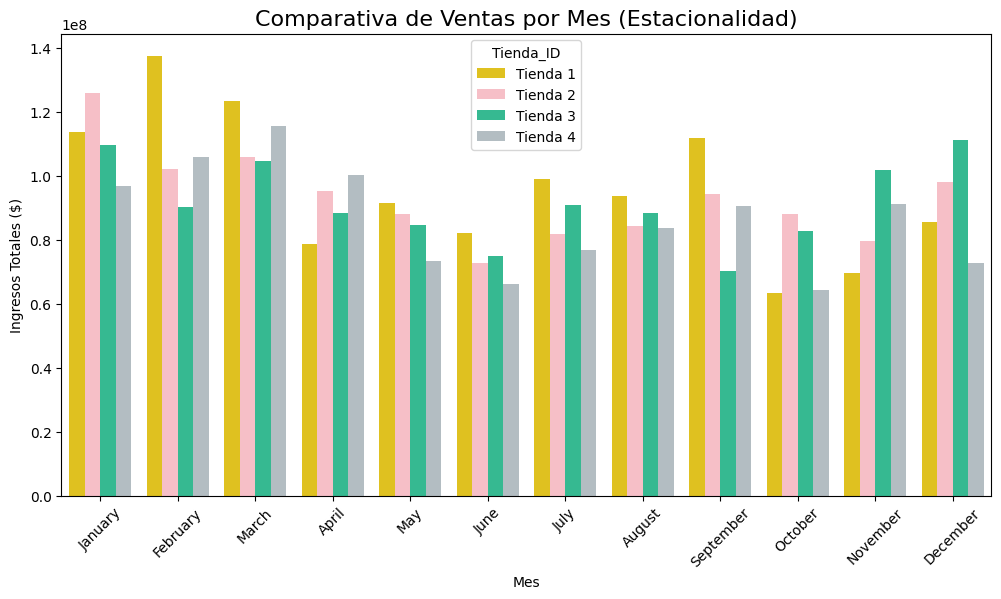

In [9]:
analizar_meses_demandados(df_total)

## Análisis del Método de Pago

### Objetivo
Esta función `graficar_torta_pagos(df_total)` visualiza la distribución porcentual de los diferentes medios de pago por los clientes.

### Entrada esperada
- `df_tiendas`: DataFrame de pandas que contiene, al menos, las columnas:
  - `Método de pago` — variable categórica.

### Líneas de códigos relevantes:

1. **Conteo de Frecuencias se calcula cuántas veces se utilizó cada medio de pago.**
```python
conteo_pagos = df['Método de pago'].value_counts()
```

In [12]:
def graficar_torta_pagos(df):
    conteo_pagos = df['Método de pago'].value_counts()
    
    etiquetas = conteo_pagos.index
    valores = conteo_pagos.values
    
    plt.figure(figsize=(8, 8))

    desfase = [0.05] * len(etiquetas)
    
    plt.pie(valores, 
            labels=etiquetas, 
            autopct='%1.1f%%', 
            startangle=90,
            explode=desfase, 
            colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], 
            shadow=True) 
            
    plt.title('Distribución de Métodos de Pago', fontsize=16, fontweight='bold')
    plt.show()


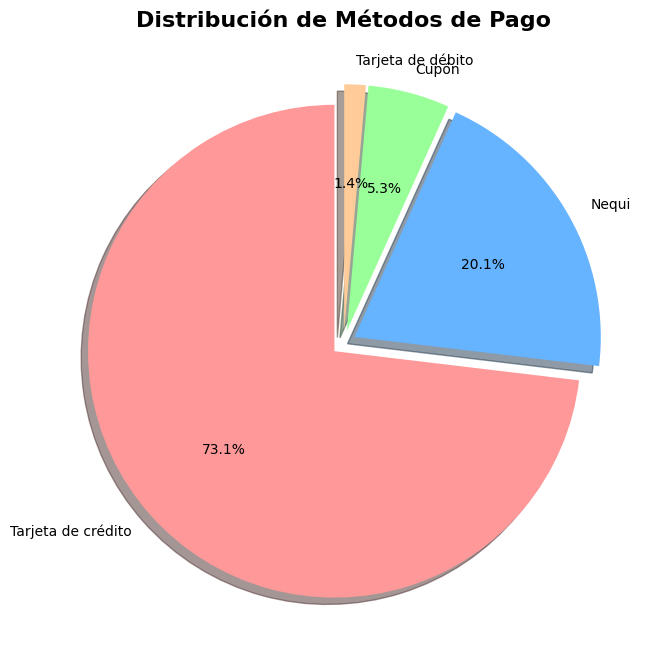

In [13]:
graficar_torta_pagos(df_total)

## Tendencia Histórica

### Objetivo
La función `grafica_lineal_ventas(df_total)` visualiza la ingresos totales de la empresa a lo largo del tiempo.

### Entrada esperada
- `df_tiendas`: DataFrame de pandas que contiene, al menos, las columnas:
  - `Fecha de Compra` — columna del tipo datetime.
  - `Precio` — columna numérica con el valor de las ventas.

### Líneas de códigos relevantes:

1. **Agrupación Temporal, convierte las fechas diarias en períodos mensuales fijos y suma los ingresos de ese lapso.**
```python
ventas_tiempo = df.groupby(df['Fecha de Compra'].dt.to_period('M'))['Precio'].sum()
```

In [ ]:
def grafica_lineal_ventas(df):

    #df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'])
    
    ventas_tiempo = df.groupby(df['Fecha de Compra'].dt.to_period('M'))['Precio'].sum()
    
    fechas = ventas_tiempo.index.astype(str) # Eje X
    ingresos = ventas_tiempo.values          # Eje Y
    
    plt.figure(figsize=(12, 6))
    
    plt.plot(fechas, ingresos, marker='o', linestyle='-', color='#2b8cbe', linewidth=2, label='Ingresos Totales')
    
    plt.title('Tendencia de Ventas Mensuales', fontsize=16)
    plt.xlabel('Meses')
    plt.ylabel('Total Vendido ($)')
    plt.xticks(rotation=45) # Rotar fechas para leerlas bien
    plt.grid(True, linestyle='--', alpha=0.5) # Cuadrícula de fondo
    plt.legend() 
    
    plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
    
    plt.tight_layout()
    plt.show()


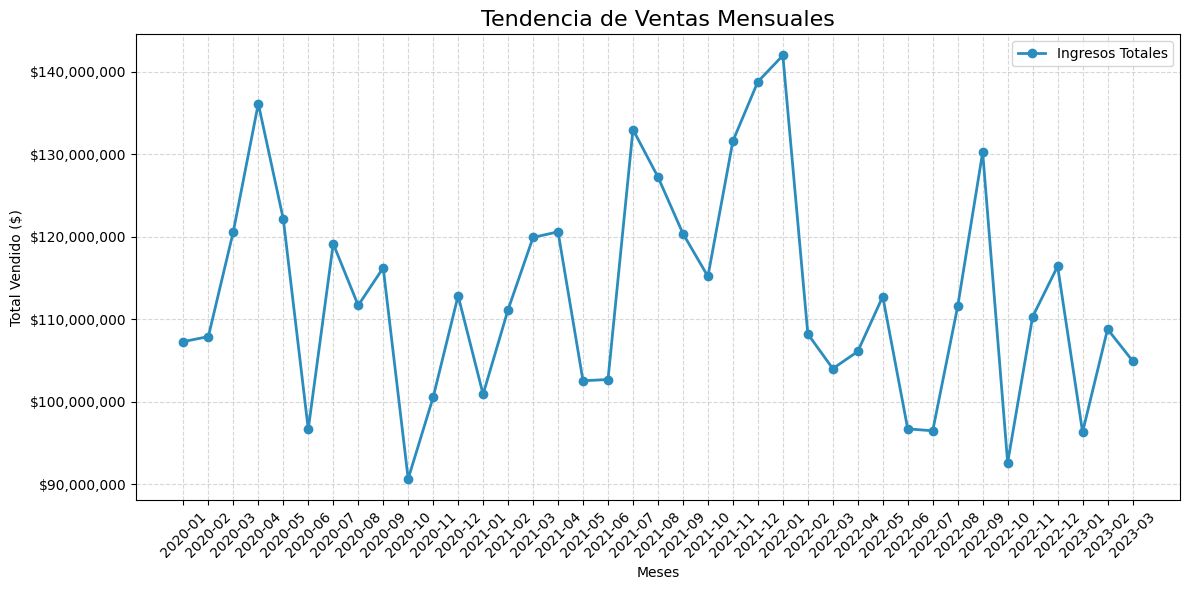

In [19]:
grafica_lineal_ventas(df_total)

## Rentabilidad

### Objetivo
La función `analizar_rentabilidad_neta(df_total)` visualiza la rentabilidad operativa de cada tienda. A diferencia del gráfico de ingresos brutos, este análisis descuenta los costos logísticos (costo de envío).

### Entrada esperada
- `df_tiendas`: DataFrame de pandas que contiene, al menos, las columnas:
  - `Tienda_ID` — identificador de la tienda.
  - `Precio` — columna numérica con el valor de las ventas.
  - `Costo de envío` — El gasto logístico asociado a esa venta.

### Líneas de códigos relevantes:

1. **Cálculo de Margen se crea una columna virtual restando el costo de envío al precio de venta.**
```python
  df['Ganancia_Neta'] = df['Precio'] - df['Costo de envío']
```
2. **Agregación de Datos, suma las ganancias netas individuales para obtener el total de utilidad por tienda.**
```python
  rentabilidad = df.groupby('Tienda_ID')['Ganancia_Neta'].sum().reset_index()
```


In [25]:
def analizar_rentabilidad_neta(df):
    df['Ganancia_Neta'] = df['Precio'] - df['Costo de envío']
    
    # Agrupar por tienda
    rentabilidad = df.groupby('Tienda_ID')['Ganancia_Neta'].sum().reset_index()
    
    plt.figure(figsize=(10, 6))
    
    ax = sns.barplot(
        data=rentabilidad, 
        x='Tienda_ID', 
        y='Ganancia_Neta', 
        hue='Tienda_ID',      
        palette='Greens_d',   
        legend=False
    )
    
    plt.title('Rentabilidad Neta por Tienda\n(Ingresos - Costo de Envío)', fontsize=16, fontweight='bold')
    plt.xlabel('Tienda')
    plt.ylabel('Ganancia Neta ($)')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
    for container in ax.containers:
        ax.bar_label(container, fmt='${:,.0f}', padding=3, fontweight='bold')
        
    plt.tight_layout()
    plt.show()



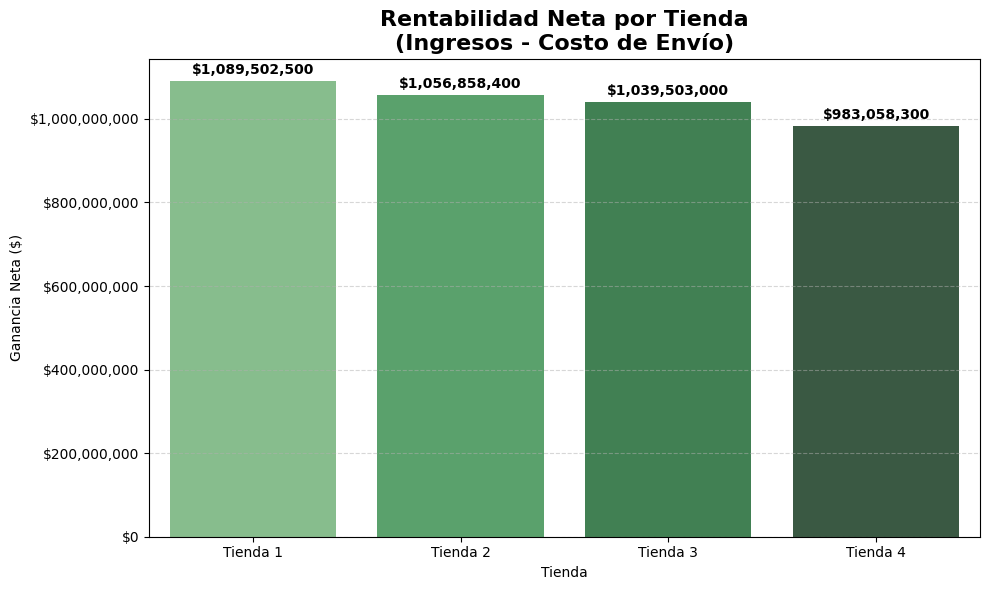

In [26]:
analizar_rentabilidad_neta(df_total)

## Boxplot para la satisfacción del cliente

### Objetivo
La función `analizar_satisfaccion_detalle(df_total)` analiza la distribución de las calificaciones de satisfacción del cliente.

### Entrada esperada
- `df_tiendas`: DataFrame de pandas que contiene, al menos, las columnas:
  - `Tienda_ID` — identificador de la tienda.
  - `Calificación` — variable numérica con la puntuacion (1 a 5).



In [ ]:
def analizar_satisfaccion_detalle(df):
    plt.figure(figsize=(10, 6))
    
    sns.boxplot(
        data=df, 
        x='Tienda_ID', 
        y='Calificación',
        hue='Tienda_ID',     
        legend=False,        
        palette='pastel',  
        showfliers=False  
    )
    
   
    sns.stripplot(
        data=df, 
        x='Tienda_ID', 
        y='Calificación', 
        color='black', 
        alpha=0.3, 
        jitter=True
    )
    
    plt.title('Distribución de la Satisfacción del Cliente', fontsize=16)
    plt.ylabel('Estrellas (1 a 5)')
    plt.show()


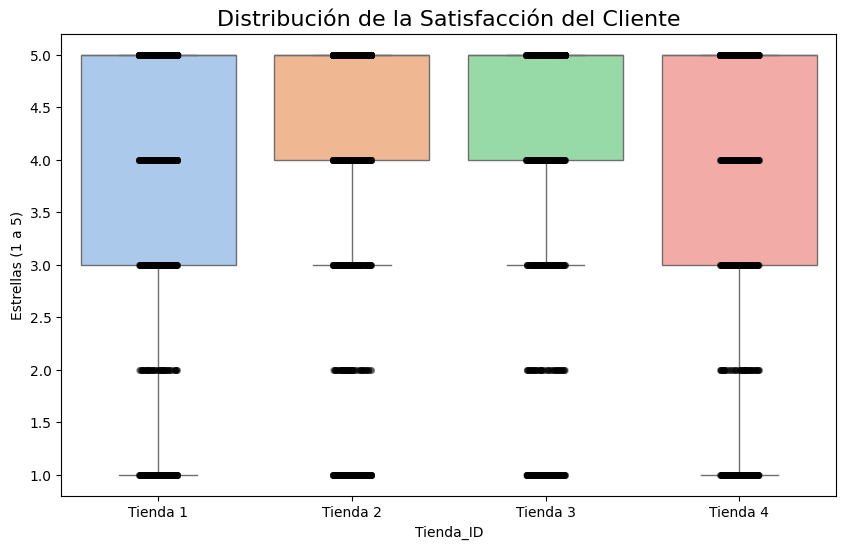

In [ ]:
analizar_satisfaccion_detalle(df_total)

# Extra

## Distribución geográfica de ventas por categorías

### Objetivo
La función `graficar_mapa_categorias(df_total)` se visualiza la distribución de las ventas por el tipo de producto. Identificar patrones de consumo, productos con mayor demanda en zonas específicas.

### Entrada esperada
- `df_tiendas`: DataFrame de pandas que contiene, al menos, las columnas:
  - `lat, lon` — coordenadas geográficas.
  - `Categoría del Producto` — variable categórica de Productos.


In [18]:
def graficar_mapa_categorias(df):
    plt.figure(figsize=(14, 10))

    sns.scatterplot(
        data=df,
        x='lon',
        y='lat',
        hue='Categoría del Producto',  # Colorea según la categoría
        palette='tab10',     
        alpha=0.6,          
        s=100,               
        edgecolor=None       
    )

    plt.title('Distribución Geográfica de Ventas por Categoría', fontsize=16, fontweight='bold')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')

    plt.axis('equal')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Categorías')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


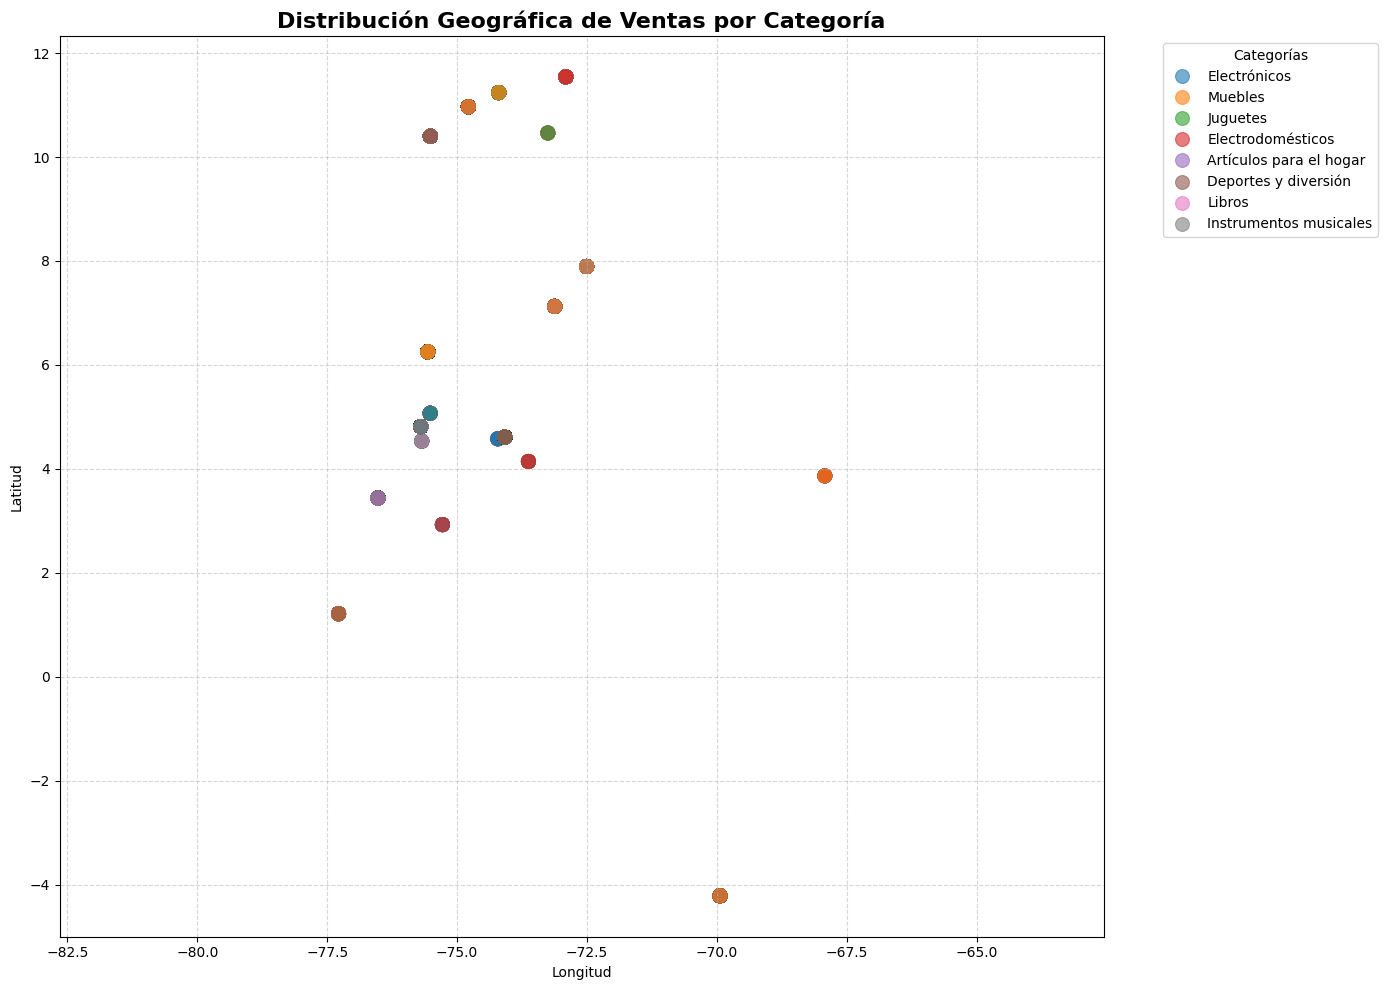

In [19]:
graficar_mapa_categorias(df_total)

## Gráfica de satisfacción

### Objetivo
La función `graficar_mapa_satisfaccion(df_total)` se evalúa la calidad del servicio desde una perspectiva geográfica.

### Entrada esperada
- `df_tiendas`: DataFrame de pandas que contiene, al menos, las columnas:
  - `lat, lon` — coordenadas geográficas.
  - `Tienda_ID` — identificador categórico de Tiendas.
  - `Calificación` — variable numérica (1-5).



In [27]:
def graficar_mapa_satisfaccion(df):
    g = sns.relplot(
        data=df,
        x="lon", 
        y="lat",
        col="Tienda_ID",    
        col_wrap=2,
        
        hue="Calificación", 
        size="Calificación",
        
        palette="RdYlGn",   
        sizes=(50, 200),   
        alpha=0.7,
        height=4, aspect=1.2
    )
    
    g.fig.suptitle('Mapa de Calor de Calidad', y=1.02, fontsize=16, fontweight='bold')
    plt.show()



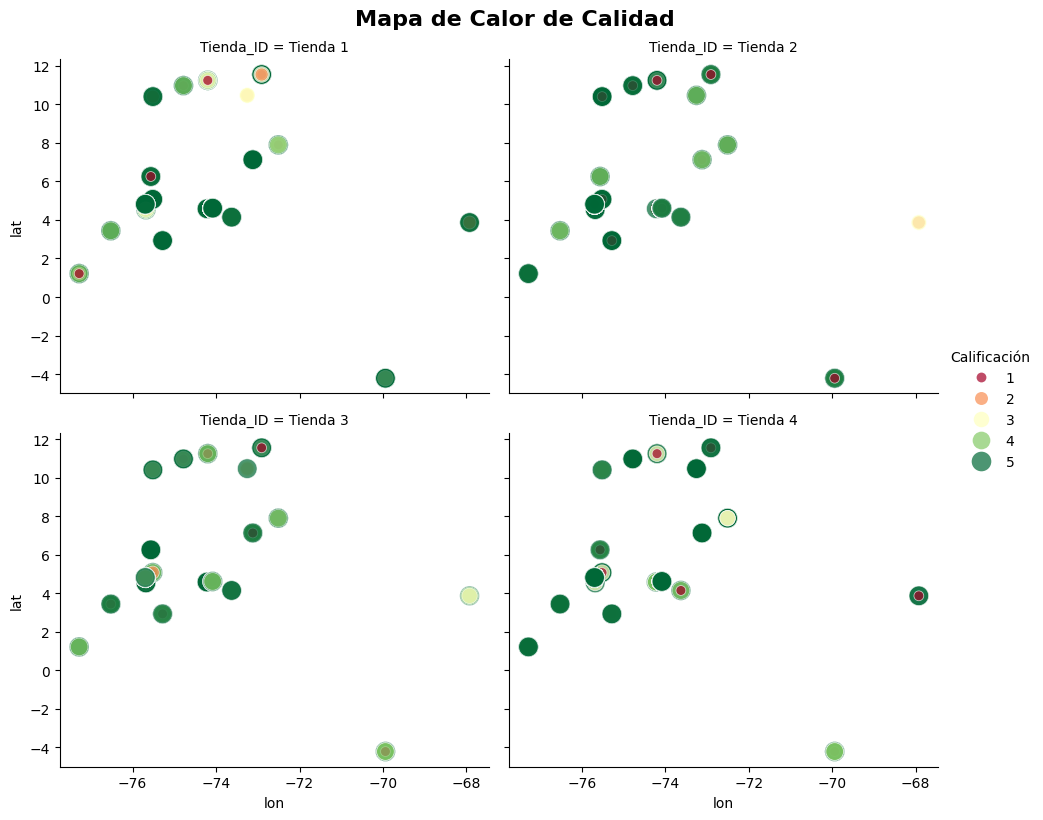

In [29]:
graficar_mapa_satisfaccion(df_total)

# 📑 Informe Final:

## 1. Introducción y Propósito

Este informe presenta un análisis integral del desempeño de las cuatro tiendas propiedad del Sr. Juan, con el objetivo de identificar cuál representa la mejor oportunidad de venta estratégica. El análisis se basaen múltiples dimensiones: Ingresos totales, categorías de productos, calificaciones de clientes, productos más vendidos y costos operativos. 

La finalidad última de este documento es proporcionar una recomendación basada en datos sobre **qué tienda debe ser vendida o cerrada** para optimizar la rentabilidad del negocio.

---

## 2. Desarrollo

### A. Análisis Financiero (Ingresos Totales)
Se observa en la imagen que la **Tienda 1** lidera en ingresos con $34.5M más que la Tienda 2 y $112.9M más que la Tienda 4.


<div align="center">
  <img src="images/grafico_ingresos.png" width="500" />
  <p>Figura 1: Ingresos Totales</p>
</div>


### B. Distribución de Productos

Todas las tiendas presentan una homogeneidad en sus categorías principales, dominadas por:

- **Muebles**: categoría líder en todas las tiendas,
- **Electrónicos**: segunda categoría más fuerte,
- **Juguetes**: tercera posición consistente.

Hallaszgos clave:

- **Tienda 1**: Mayor volumen en Muebles (465) y Electrónicos (448).
- **Tienda 3**: Mejor desempeño en MUebles (499 unidades - récord).
- **Tienda 4**: Fuerte en Juguetes (338 unidades - récord).
- **Consistencia**: Las 3 categorías principales son las mismas en todas las tiendas.


### C. Análisis de Calidad (Satisfacción del Cliente)
La **Tienda 3** lidera en calidad percibida, mientras que la Tienda 1 y 4 presentan los índices más bajos.

* **Líder de Calidad:** Tienda 3 (Promedio: **4.05**) y Tienda 2 (Promedio: 4.04).
* **Zona de Riesgo:** Tienda 4 (Promedio: **4.00**) y Tienda 1 (Promedio: 3.98).

<div align="center">
  <img src="images/boxplot.png" width="500" />
  <p>Figura 2: Satisfacción del cliente</p>
</div>

Aunque todas tienen calificaciones altas (>3.98), la Tienda 3 sobresale. La Tienda 1, a pesar de tener mayores ingresos, tiene la calificación más baja.

### D. Productos Más y Menos vendidos

Productos más vendidos por tienda:

   - **Tienda 1** : Microondas y TV LED UHD 4K (60 unidades)

   - **Tienda 2**: "Iniciando en programación" (65 unidades)

   - **Tienda 3**: Kit de bancas (57 unidades)

   - **Tienda 4**: Cama box (62 unidades)

Productos menos vendidos por tienda:

   - **Tienda 1**: Celular ABXY (33 unidades)

   - **Tienda 2**: Juego de mesa (32 unidades)

   - **Tienda 3**: Bloques de construcción (35 unidades)

   - **Tienda 4**: Guitarra eléctrica (33 unidades)

Cada tienda muestra especialización diferente, lo que reduce la competencia interna.

### E. Eficiencia Operativa (Costos de Envío)
Analizamos el costo promedio que asume la tienda por envío. Curiosamente, la tienda que menos vende es la que tiene el envío más barato promedio, lo que sugiere envíos de menor volumen o distancia.

* **Mayor Costo Promedio:** Tienda 1 ($26,018.61).
* **Menor Costo Promedio:** Tienda 4 ($23,459.46).

La tienda con costos más bajos es Tienda 4, pero esto no se acompaña de mejores ingresos ni mejores calificaciones.

---

## 3. Diagnóstico: Fortalezas y Debilidades

En esta sección cruzamos las variables para entender la posición estratégica de las tiendas candidatas a eliminación.

### 🏢 Tienda 1:
Aunque tiene la calificación más baja (3.98) y los costos de envío más altos, es intocable por razones de flujo de caja.

* **Fortalezas:**
    * **Líder indiscutible en Ingresos:** Genera $1,150 Millones.
    * **Estacionalidad Agresiva:** El análisis temporal demostró que esta tienda posee picos de venta masivos en meses específicos que ninguna otra tienda logra replicar. Cerrarla significaría perder esa cuota de mercado estacional que la competencia no absorbe.
* **Debilidades:** Costos logísticos elevados y satisfacción del cliente mejorable.

### 🏢 Tienda 2:
Representa la estabilidad del negocio, sin grandes fallas ni riesgos operativos.
* **Fortalezas:**
    * **Alta Facturación:** Segunda en ingresos ($1,116M), muy cerca del líder.
    * **Calidad Sólida:** Calificación de 4.04, prácticamente empatada con la mejor.
    * **Nicho Específico:** Destaca en productos educativos/tecnológicos, lo que sugiere un perfil de cliente fiel y específico.
* **Debilidades:** No presenta debilidades críticas; es una operación sana y sostenible.

### 🏢 Tienda 3: 
Es el modelo a seguir, combinando volumen con reputación.
* **Fortalezas:**
    * **Líder en Calidad:** Máxima calificación promedio (4.05), lo que garantiza retención de clientes a largo plazo.
    * **Eficiencia:** Costos de envío ($24,805) más controlados que las Tiendas 1 y 2.
    * **Capacidad de Absorción:** Ha demostrado picos de venta altos, lo que sugiere que podría absorber la demanda de otras tiendas en caso de reestructuración.
* **Debilidades:** Tercera en ingresos totales, aunque la diferencia con la Tienda 2 es marginal.

### 🏢 Tienda 4:
Aquí relacionamos la rentabilidad con la satisfacción para evidenciar su inviabilidad.

* **Fortalezas:**
    * Costo de envío promedio bajo ($23,459).
* **Debilidades (Relación Rentabilidad/Satisfacción):**
    * **Baja Rentabilidad Relativa:** Es la tienda con **menores ingresos totales** ($1,038 Millones). El hecho de que sus costos de envío sean bajos no compensa su falta de volumen de ventas; simplemente mueve menos mercancía de valor.
    * **Estancamiento en Calidad:** Con una calificación de 4.00, se ubica en el segmento inferior de satisfacción junto con la Tienda 1, pero **sin la facturación que justifique mantenerla**.
    * **Inconsistencia:** No destaca ni por ser la que más vende (como la Tienda 1), ni por ser la que mejor atiende (como la Tienda 3), ni por estabilidad (como la Tienda 2).

<div align="center">
  <img src="images/evolucionTemporal.png" width="800" />
  <p>Figura 3: Evolución temporal de tiendas</p>
</div>


---

## 4. Conclusión y Recomendación

Tras evaluar los ingresos, la satisfacción del cliente, los costos operativos y el comportamiento temporal de las ventas, la recomendación final para el Sr. Juan es:

### 🚨 **VENDER LA TIENDA 4**

**Justificación de la Decisión:**

1.  **Desempeño Financiero Inferior:** La Tienda 4 es la menos ingresos genera, con una diferencia cercana al **10% respecto a la tienda líder**. Mantener la tienda con el menor retorno hace que su operación sea la menos rentable del conjunto.
2.  **Menor Valor Estratégico:** A pesar de tener una calificación aceptable (4.00), la Tienda 4 no compensa con volumen de ventas ni con categorías destacadas. No presenta fortalezas competitivas claras, lo que la convierte en la alternativa más prescindible.
3.  **Sin Ventajas Estacionales::** Se descarta la venta de la **Tienda 1** a pesar de sus costos y calificaciones, debido a que sus **picos de venta estacionales** son críticos para el flujo de caja anual de la empresa. La Tienda 4 no demostró esta capacidad de "explosión" de ventas en el análisis temporal.
